In [1]:
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 1.255 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.211 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 4.059 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.005 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.126 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.011 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 0.668 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.007 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.005 s to import Code.Utils.Names
It took 6.347 s to import all of the active modules


In [2]:
from pyMez.Code.Analysis.SParameter import *
from pyMez.Code.DataHandlers.MUFModels import *
from pyMez.Code.DataHandlers.GraphModels import *
from pyMez.Code.DataHandlers.Translations import *

## Repeatability 

In [3]:
with_alignment_directory=r"C:\Share\WR15_OML_MUF_20180313\TRL_Base\DUTs\With Alignment Pins"
without_alignment_directory=r"C:\Share\WR15_OML_MUF_20180313\TRL_Base\DUTs\Without Alignment Pins"
all_raw_directory=r"C:\Share\WR15_OML_MUF_20180313\TRL_Base\RawMeasurements"
all_corrected_directory=r"C:\Share\WR15_OML_MUF_20180313\TRL_Base\CorrectedNominal"

### All raw thrus as a check of repeatability 

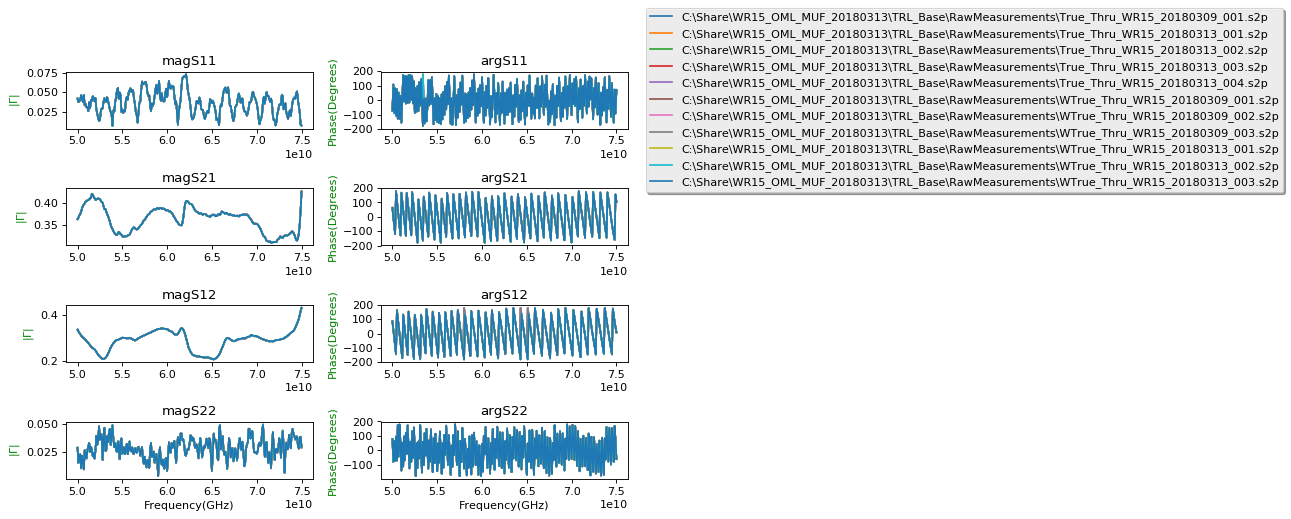

In [4]:
raw_thru_s2ps=[S2PV1(os.path.join(all_raw_directory,file_name)) for file_name in os.listdir(all_raw_directory)]
compare_s2p_plots(raw_thru_s2ps);

In [5]:
initial_s2p=raw_thru_s2ps[0]
initial_s2p.change_data_format("MA")
ascii_joined_table=Snp_to_AsciiDataTable(initial_s2p)
for s2p in raw_thru_s2ps[1:]:
    s2p.change_data_format("MA")
    ascii_joined_table+Snp_to_AsciiDataTable(s2p)
mean_s2p=s2p_mean(raw_thru_s2ps)
standard_deviation=frequency_model_collapse_multiple_measurements(model=ascii_joined_table,method="std")

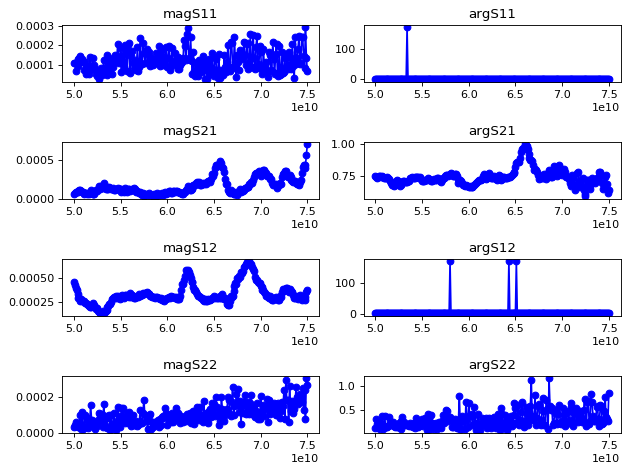

In [6]:
plot_frequency_model(standard_deviation);

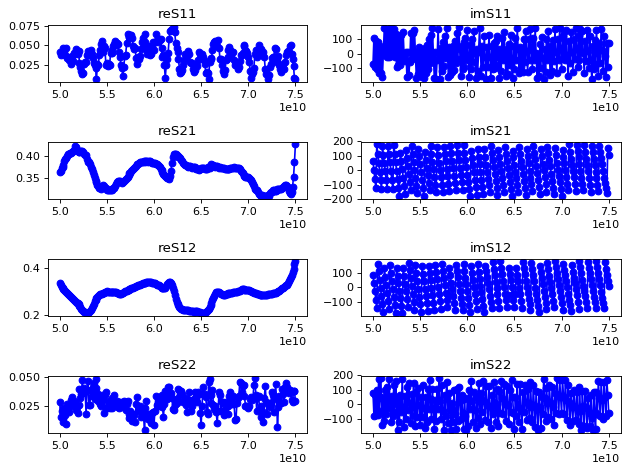

In [7]:
plot_frequency_model(mean_s2p);

### All Corrected Thrus as a repeatability check 

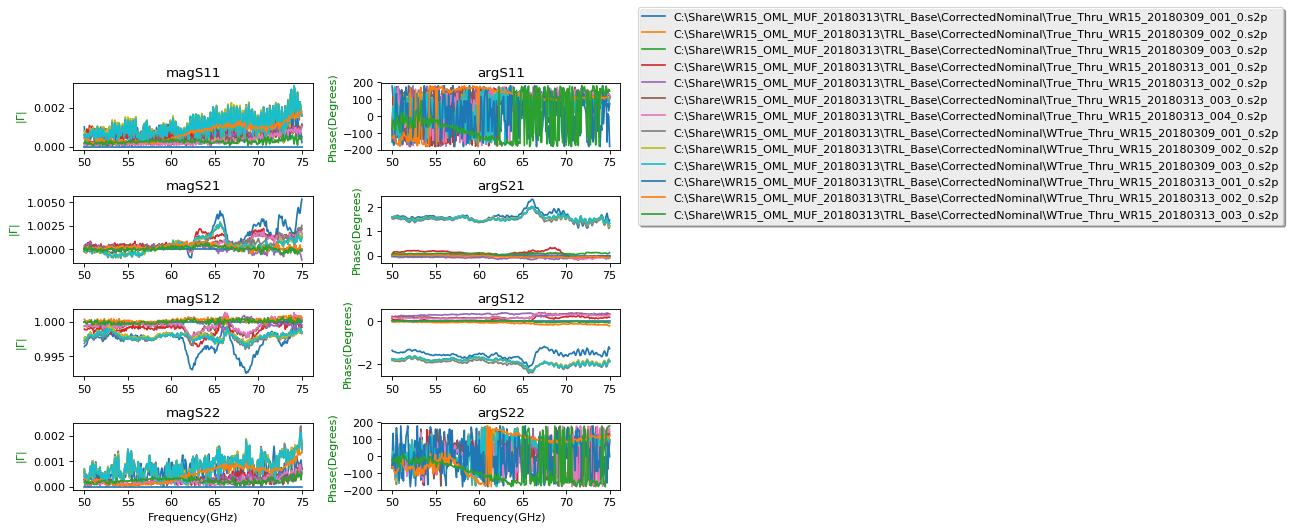

In [8]:
corrected_thru_s2ps=[S2PV1(os.path.join(all_corrected_directory,file_name)) for file_name in os.listdir(all_corrected_directory)]
compare_s2p_plots(corrected_thru_s2ps);

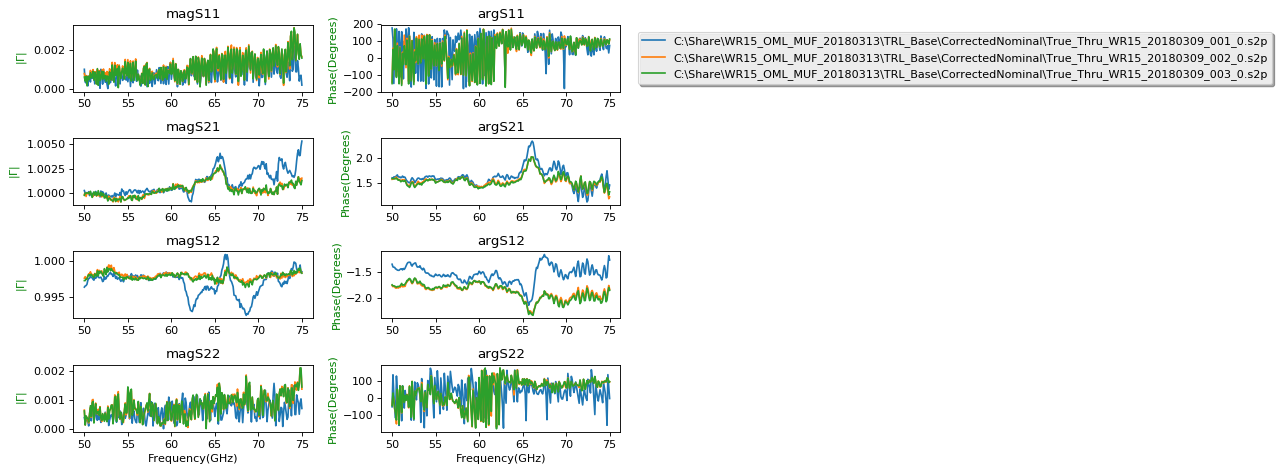

In [9]:
compare_s2p_plots(corrected_thru_s2ps[0:3]);

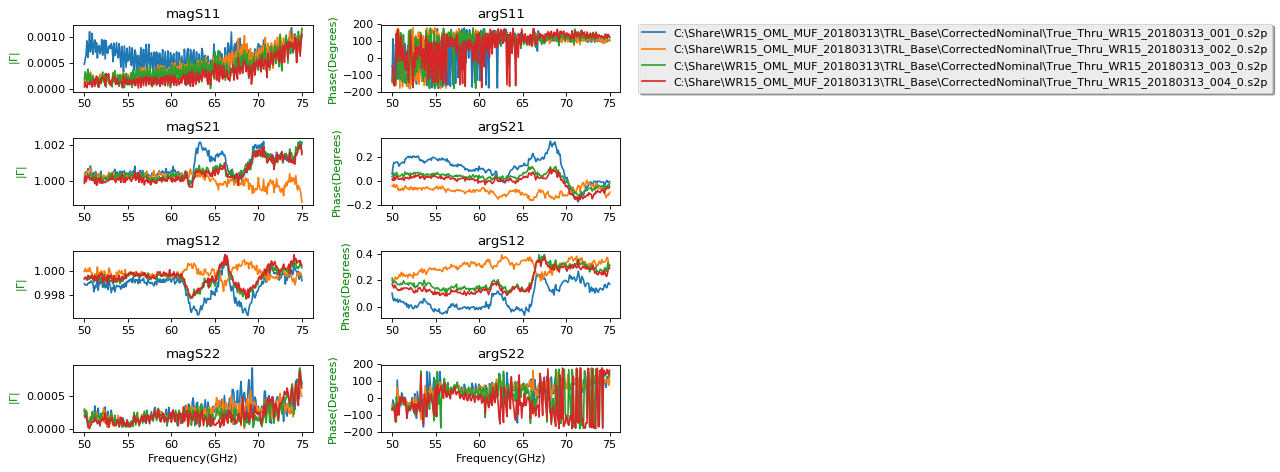

In [10]:
compare_s2p_plots(corrected_thru_s2ps[3:7]);

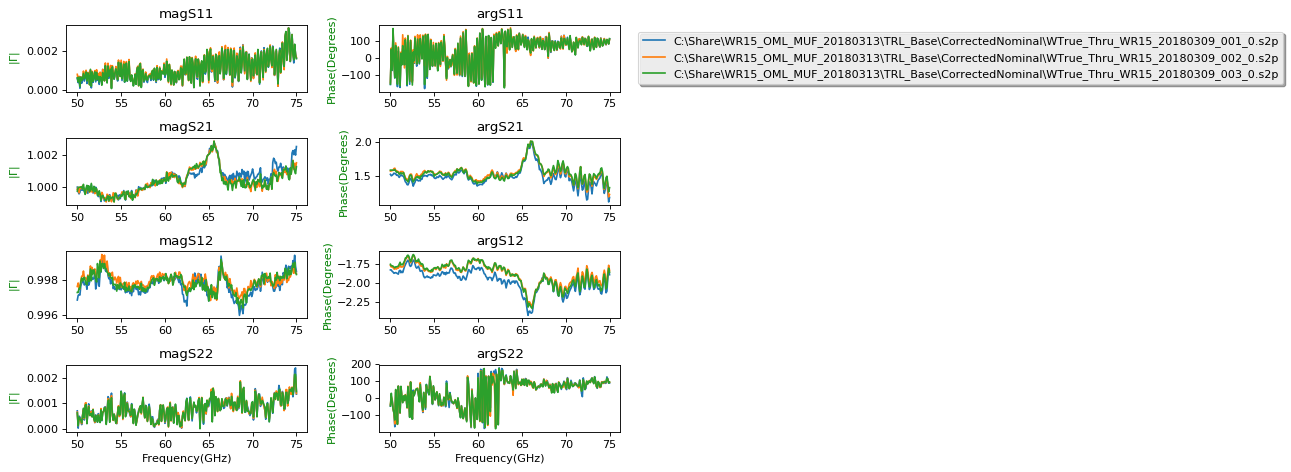

In [11]:
compare_s2p_plots(corrected_thru_s2ps[7:10]);

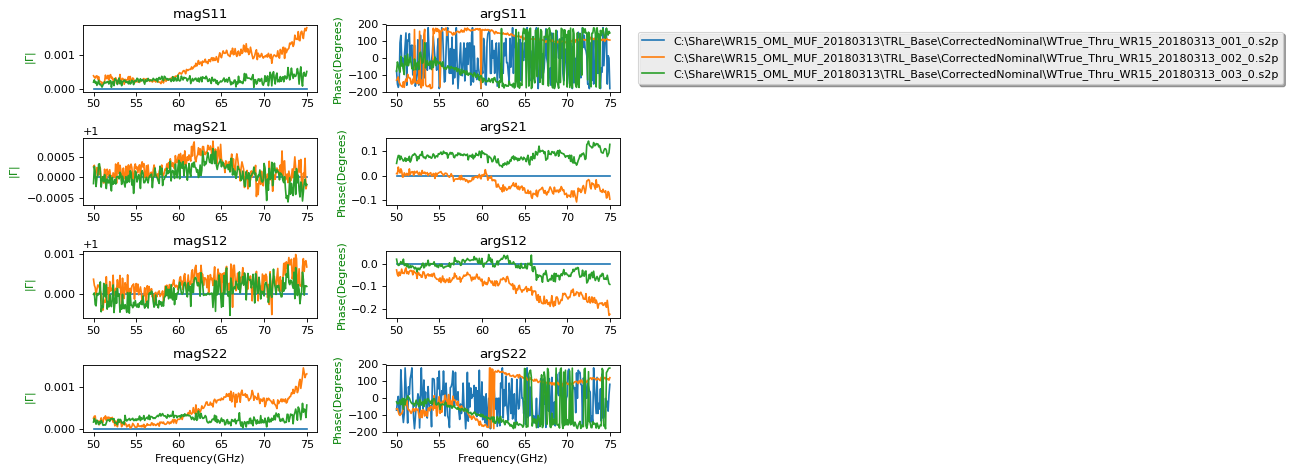

In [12]:
compare_s2p_plots(corrected_thru_s2ps[10:]);

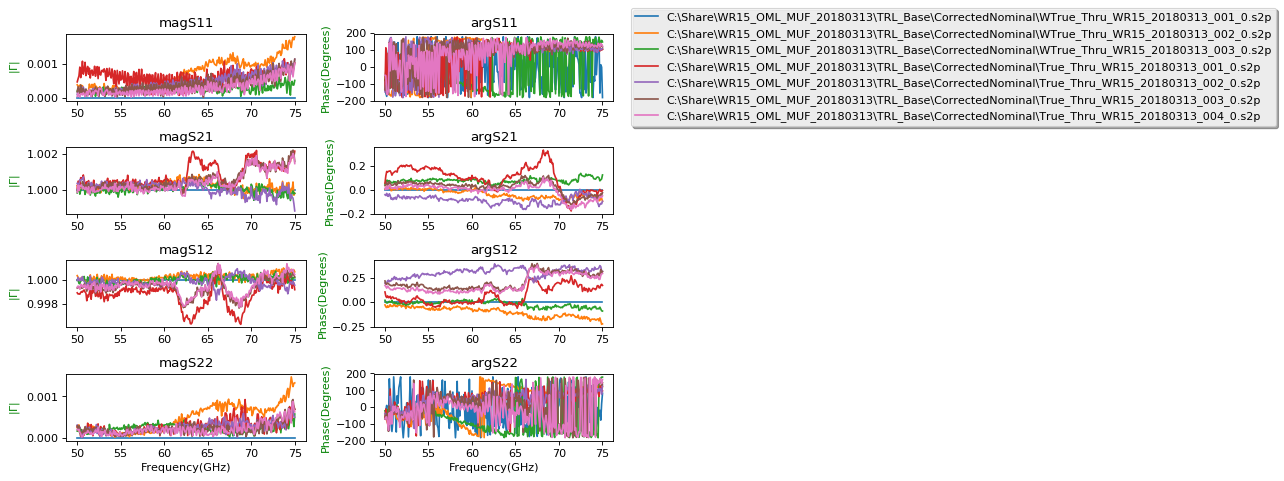

In [13]:
compare_s2p_plots(corrected_thru_s2ps[10:]+corrected_thru_s2ps[3:7]);

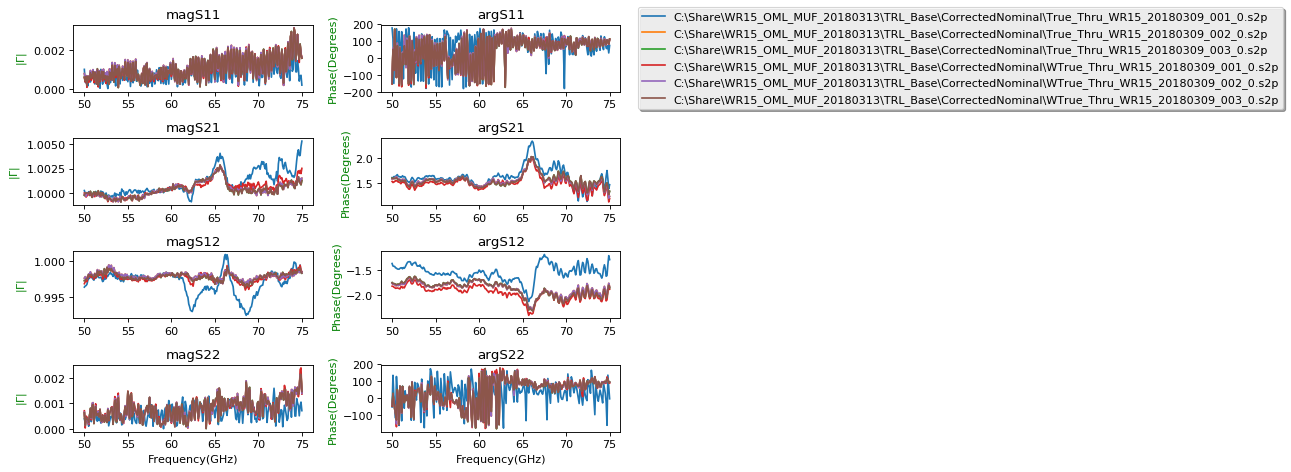

In [14]:
compare_s2p_plots(corrected_thru_s2ps[0:3]+corrected_thru_s2ps[7:10]);

In [15]:
map(lambda x:x.change_data_format("MA"),corrected_thru_s2ps)
initial_corrected_s2p=corrected_thru_s2ps[0]
corrected_ascii_joined_table=Snp_to_AsciiDataTable(initial_corrected_s2p)
for s2p in corrected_thru_s2ps[1:]:
    corrected_ascii_joined_table+Snp_to_AsciiDataTable(s2p)
mean_corrected_s2p=frequency_model_collapse_multiple_measurements(model=corrected_ascii_joined_table,method="mean")
corrected_standard_deviation=frequency_model_collapse_multiple_measurements(model=corrected_ascii_joined_table,method="std")

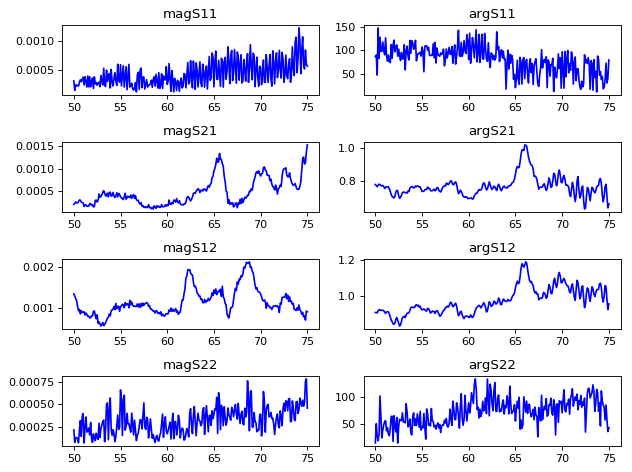

In [16]:
plot_frequency_model(corrected_standard_deviation,plot_format="b-");

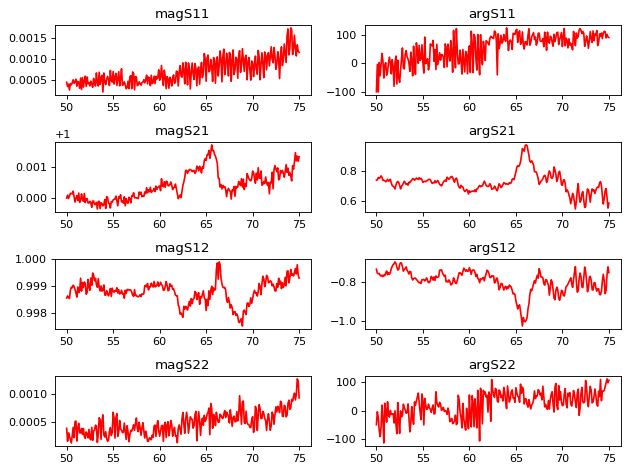

In [17]:
plot_frequency_model(mean_corrected_s2p,plot_format="r-");

## Reproducibility 

### The comparison of corrected shorts as a measure of reproducibility

In [18]:
corrected_short_directory=r"C:\Share\WR15_OML_MUF_20180313\TRL_Base\CorrectedShortsNominal"

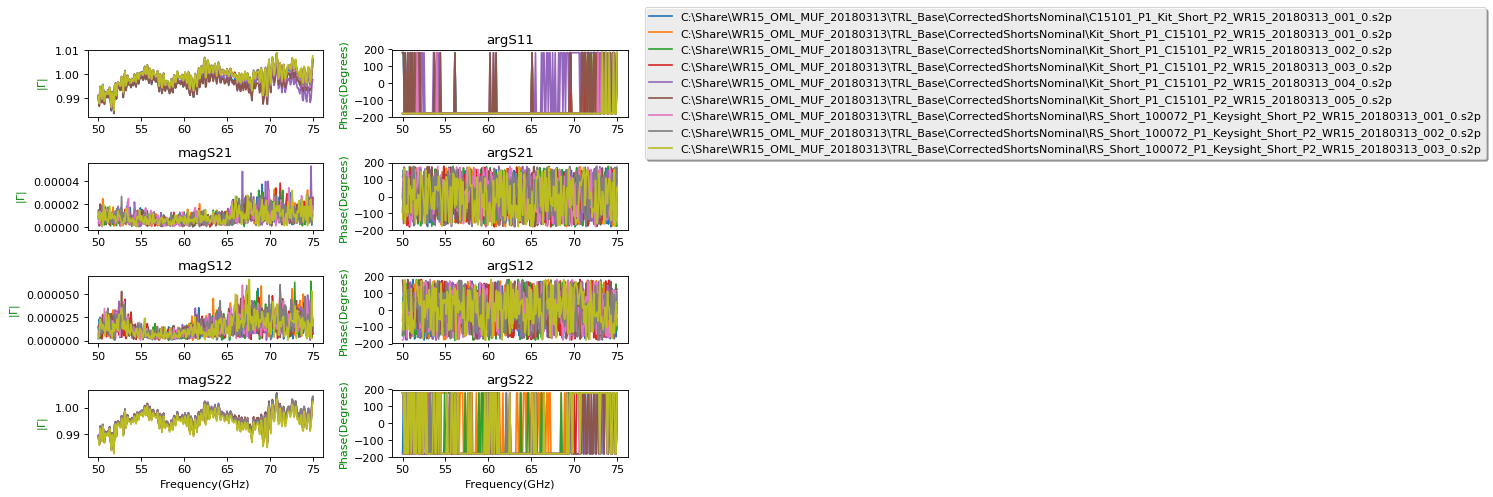

In [19]:
corrected_short_s2ps=[S2PV1(os.path.join(corrected_short_directory,file_name)) for file_name in os.listdir(corrected_short_directory)]
compare_s2p_plots(corrected_short_s2ps);

In [20]:
map(lambda x:x.change_data_format("MA"),corrected_short_s2ps)
initial_corrected_short_s2p=corrected_short_s2ps[0]
corrected_short_ascii_joined_table=Snp_to_AsciiDataTable(initial_corrected_short_s2p)
for s2p in corrected_short_s2ps[1:]:
    corrected_short_ascii_joined_table+Snp_to_AsciiDataTable(s2p)
mean_corrected_short_s2p=frequency_model_collapse_multiple_measurements(model=corrected_short_ascii_joined_table,
                                                                        method="mean")
corrected_short_standard_deviation=frequency_model_collapse_multiple_measurements(model=corrected_short_ascii_joined_table,
                                                                                  method="std")

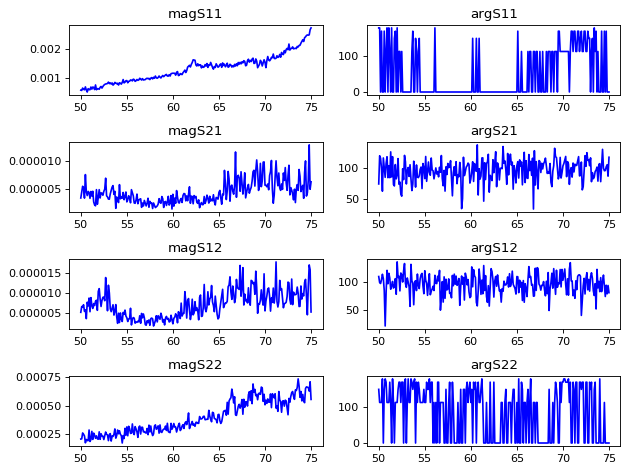

In [21]:
plot_frequency_model(corrected_short_standard_deviation,plot_format="b-");

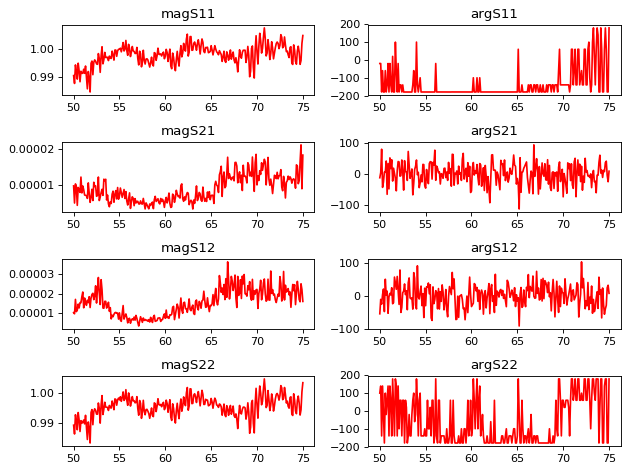

In [22]:
plot_frequency_model(mean_corrected_short_s2p,plot_format="r-");

In [23]:
all_shorts_mag_S11=[s2p["magS11"] for s2p in corrected_short_s2ps[:]]
all_shorts_mag_S22=[s2p["magS22"] for s2p in corrected_short_s2ps[:]]
all_shorts=all_shorts_mag_S11+all_shorts_mag_S22


In [24]:
all_shorts_array=map(lambda x:np.array(map(lambda y:float(y),x)),all_shorts)

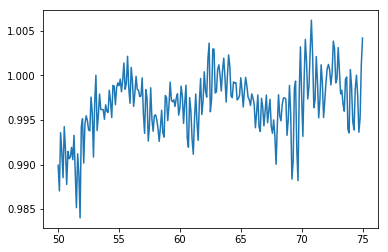

In [25]:
plt.plot(corrected_short_s2ps[0]["Frequency"],np.mean(all_shorts_array,axis=0))
plt.show()

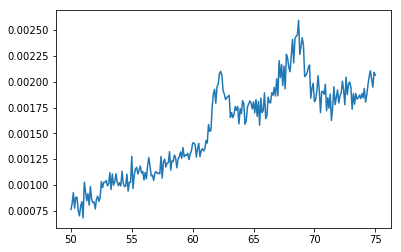

In [26]:
plt.plot(corrected_short_s2ps[0]["Frequency"],np.std(all_shorts_array,axis=0))
plt.show()

### Calrep of all shorts

In [27]:
raw_data_file=corrected_short_ascii_joined_table.copy()
raw_data_file.options["Connector_Type_Measurement"]="WR15"
raw_data_file.metadata={}
raw_data_file.metadata["Connector_Type_Measurement"]="WR15"
calrep_short=calrep(raw_data_file)


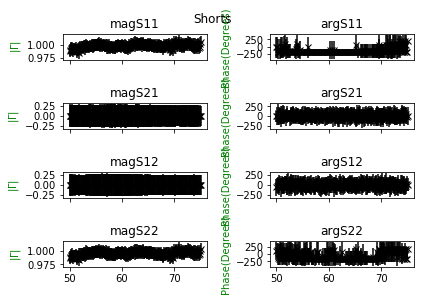

In [30]:
calrep_short.metadata["Device_Id"]="Shorts"
plot_calrep(calrep_short);

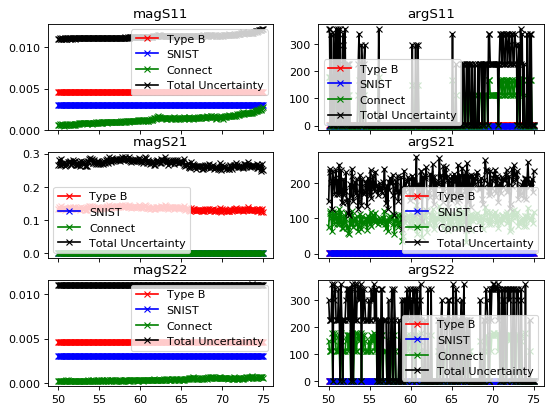

In [33]:
calrep_short.metadata["Measurement_Type"]='2-port'
plot_calrep_uncertainty(calrep_short);

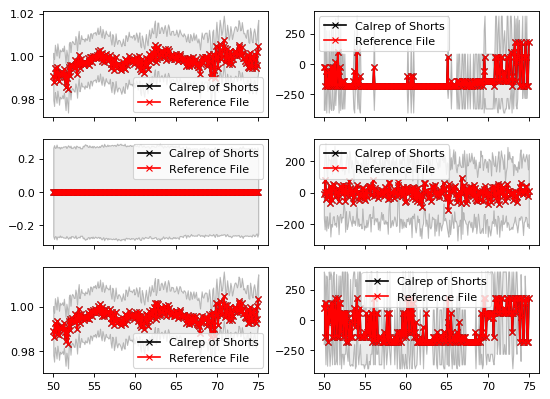

In [35]:
plot_calrep_results_comparison(calrep_model=calrep_short,results_model=mean_corrected_short_s2p);

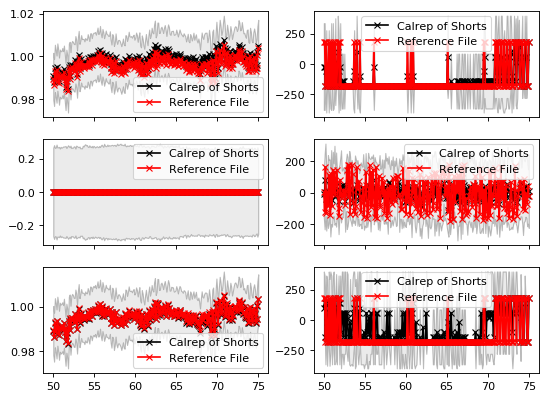

In [41]:
plot_calrep_results_comparison(calrep_model=calrep_short,results_model=corrected_short_s2ps[5]);

In [43]:
calrep_short.joined_table=calrep_short
xml=TwoPortCalrepModel_to_XmlDataTable(calrep_short)

In [46]:
html=HTMLBase(html_text=xml.to_HTML(r"C:\ProgramData\Anaconda2\Lib\site-packages\pyMez\Code\DataHandlers\XSL\TWO_PORT_CALREP_STYLE.xsl"))

In [47]:
html.save(r"C:\Share\WR15_OML_MUF_20180313\Data Analysis Plots\calrep_report.html")

'C:\\Share\\WR15_OML_MUF_20180313\\Data Analysis Plots\\calrep_report.html'

In [ ]:
instrument=HTMLBase(r"")

In [48]:
calrep_short.get_options()

inline_comments = None
data_begin_line = 2
column_names_begin_line = 1
footer_line_types = None
general_descriptor = Table
header_end_token = None
header_end_line = 1
column_names_end_line = 2
data_table_element_separator = 

escape_character = None
data = None
inline_comment_begin = None
column_descriptions = None
inline_comment_end = None
data_list_dictionary = None
data_begin_token = None
comment_end = None
header_begin_line = 0
row_end_token = None
column_names_end_token = None
block_comment_begin = None
header_begin_token = None
metadata = {'Measurement_Type': '2-port', 'Device_Id': 'Shorts', 'Connector_Type_Measurement': 'WR15'}
specific_descriptor = Data
empty_value = None
column_names_begin_token = None
footer_end_token = None
footer_begin_token = None
column_names = None
metadata_key_value_delimiter = None
column_types = ['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'flo

## Calibration Uncertainty